##  *CUSTOMER  SEGMENTATION* 

## PROBLEM STATEMENT
 
1.Analyze the Dataset.

2.Perform the EDA.

3.Create a customer segmentation with the help of similarities in between X variables.

4.Visualize the Clusters along with dataset in python notebook.

### IMPORT LIBRARIES

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## READ CSV FILES

In [42]:
df = pd.read_csv('credit_data (2).csv')


## CHECK SHAPE OF DATA

In [43]:
df.shape


(1000, 10)

### Display Top 5 Record 

In [44]:
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Get Information about our Dataset

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


#### To Get Overall Statistics about the Dataset 

In [46]:
df.describe()


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Exploratory Data Analysis(EDA)

#### Check Null Values in the Dataset

In [47]:
df.isnull().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [48]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']


In [49]:
df = df.drop(columns = unused)
df.shape


(1000, 9)

### FILL NA VALUES 

In [50]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])


## CHECKING NULL VALUES 
 
 ### NO NULL VALUES FOUND

In [51]:
df.isnull().sum()


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## DATA VISUALIZATION
 
 

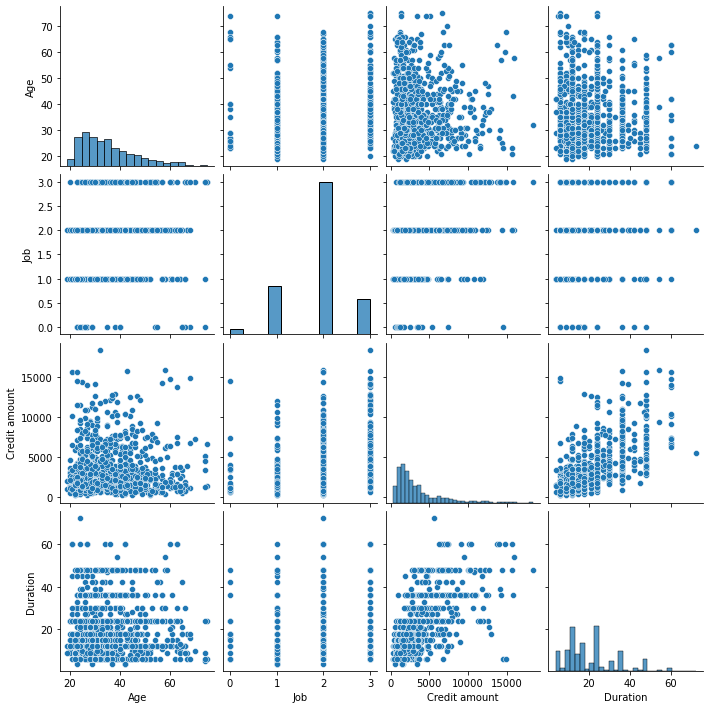

In [52]:
sns.pairplot(df)


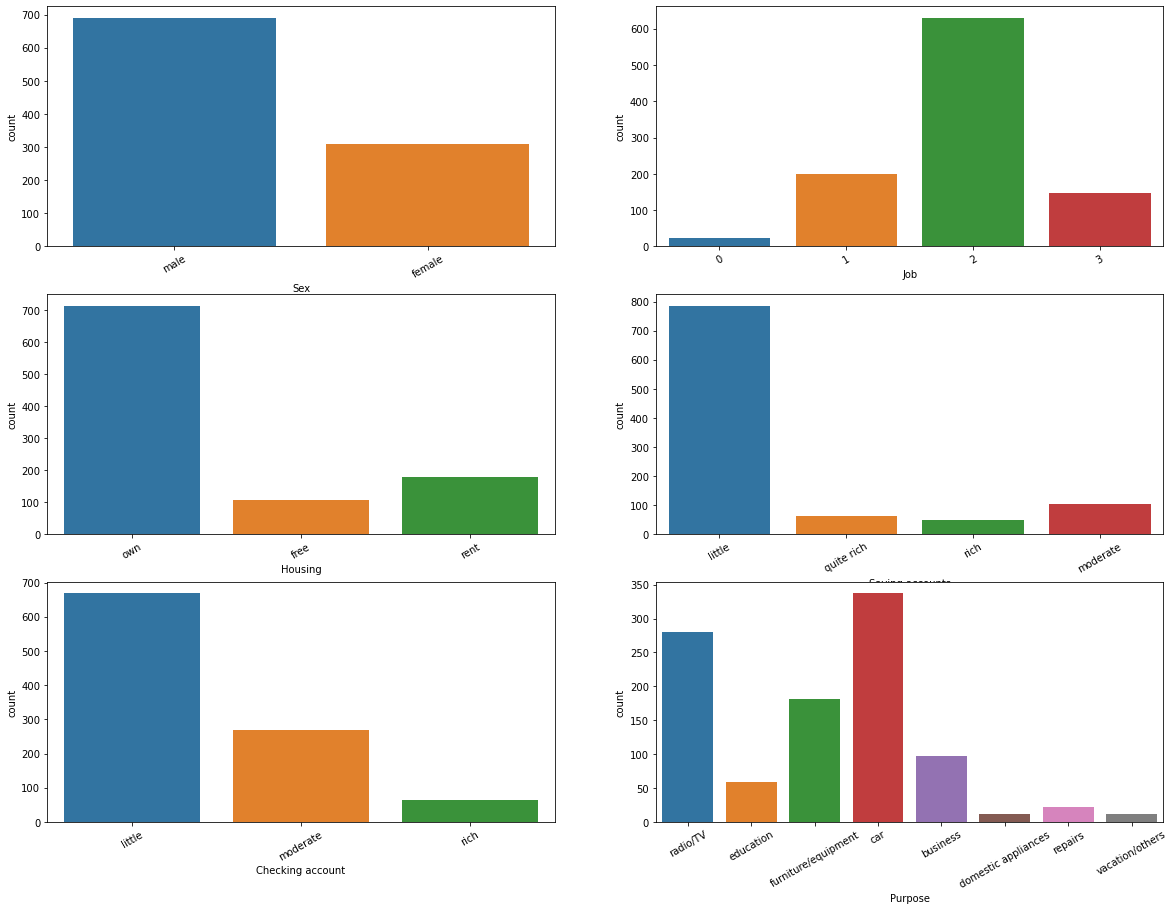

In [53]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()

<AxesSubplot:>

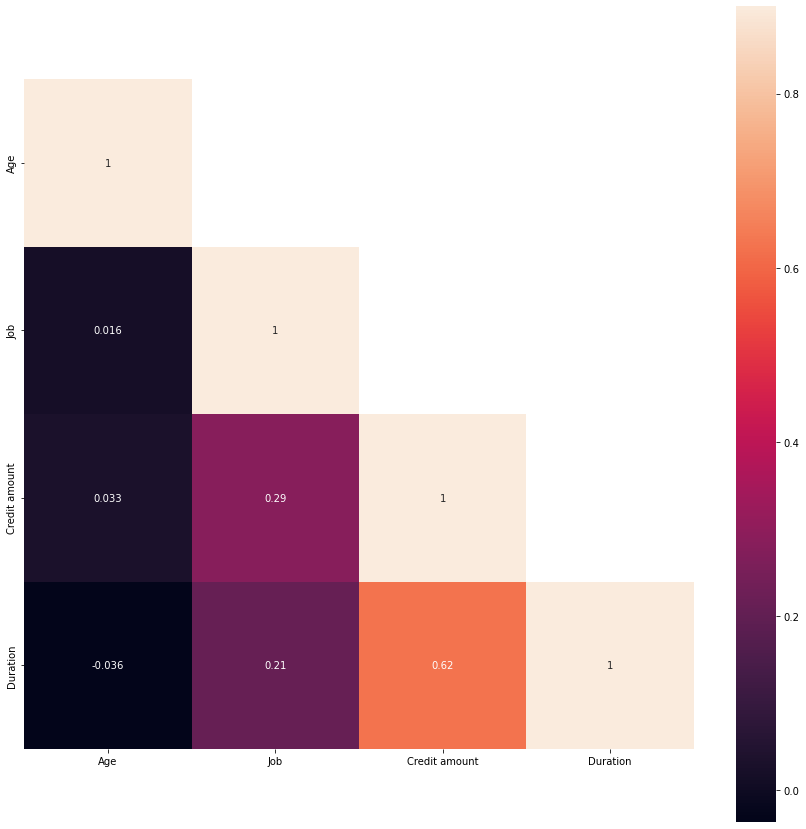

In [54]:
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [55]:
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df['Credit amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] = df['Duration']
df_cluster['Job'] = df['Job']
df_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


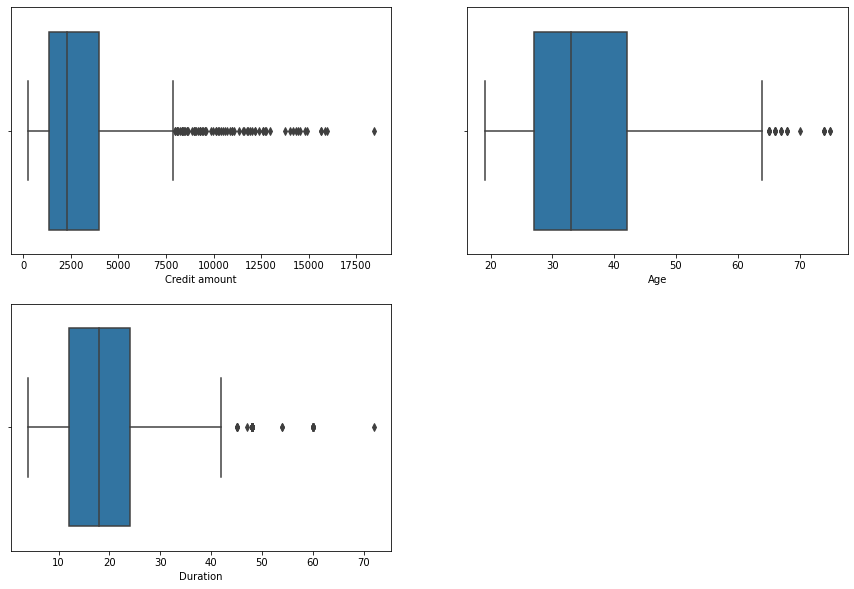

In [56]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

### DATA IS MOSTLY RIGHT SKEWED

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


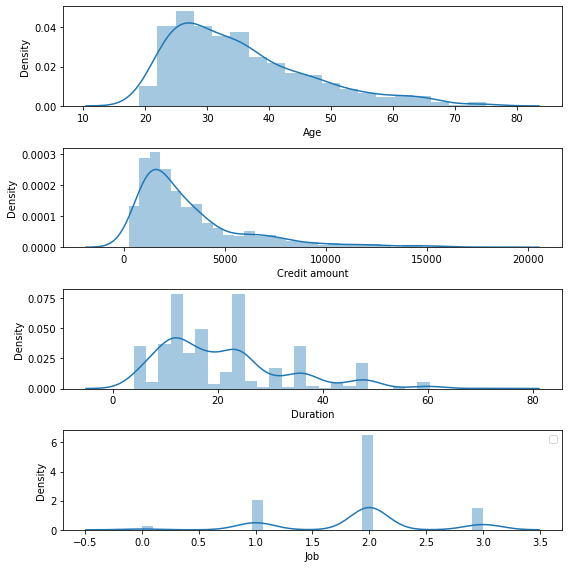

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df["Age"], ax=ax1)
sns.distplot(df["Credit amount"], ax=ax2)
sns.distplot(df["Duration"], ax=ax3)
sns.distplot(df["Job"], ax=ax4)
plt.tight_layout()
plt.legend()  

###  USING LOG FUNCTION 

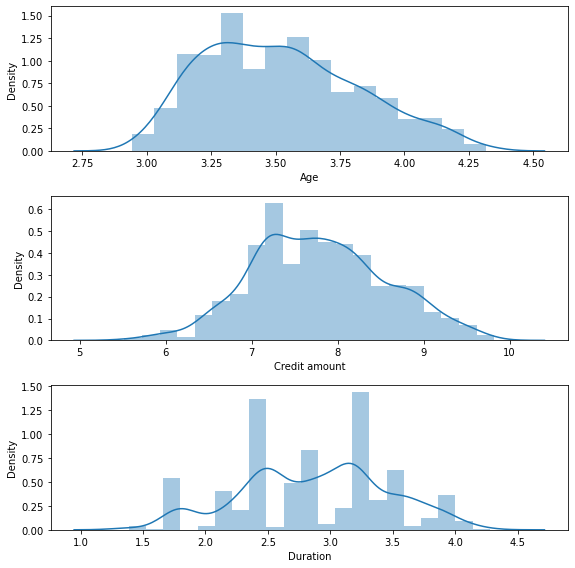

In [58]:
df_cluster_log = np.log(df_cluster[['Age', 'Credit amount','Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"], ax=ax3)
plt.tight_layout()


In [59]:
df_cluster_log.head()


,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


### SCALING DATA  

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

## MODEL

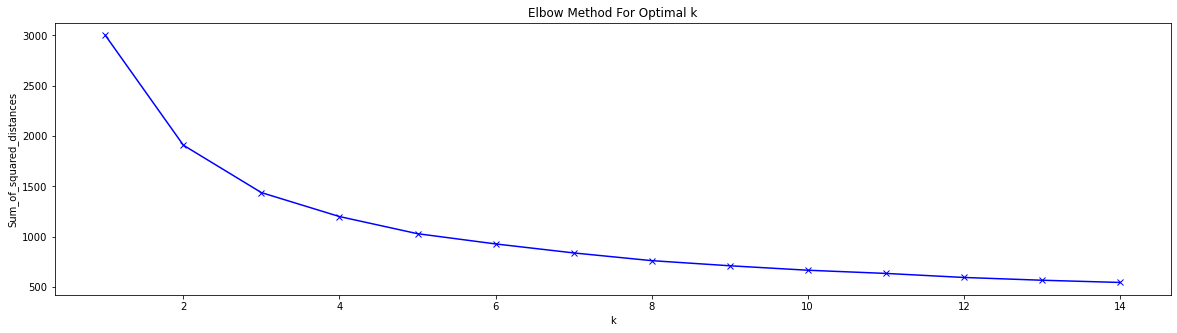

In [61]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-MEANS CLUSTERING

K-Means


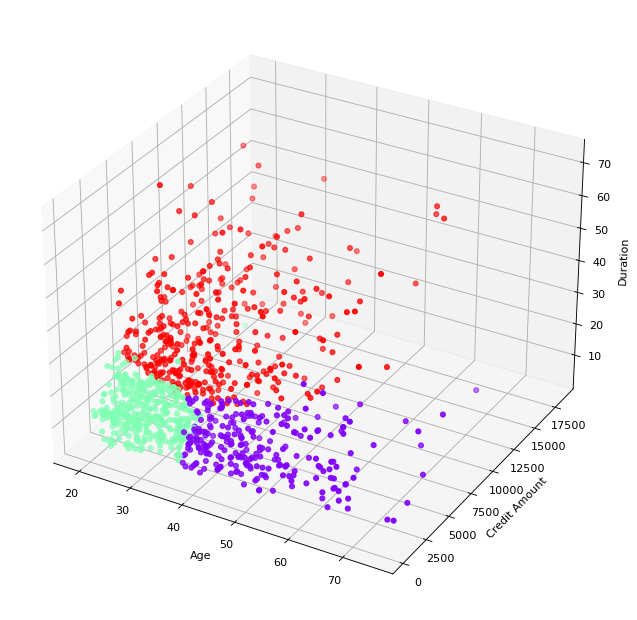

In [62]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("K-Means")

In [63]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1978.7,48.7,13.9,1.7
1,1733.6,27.8,14.2,1.8
2,5665.4,34.0,32.2,2.1


## Hierarchical Clustering

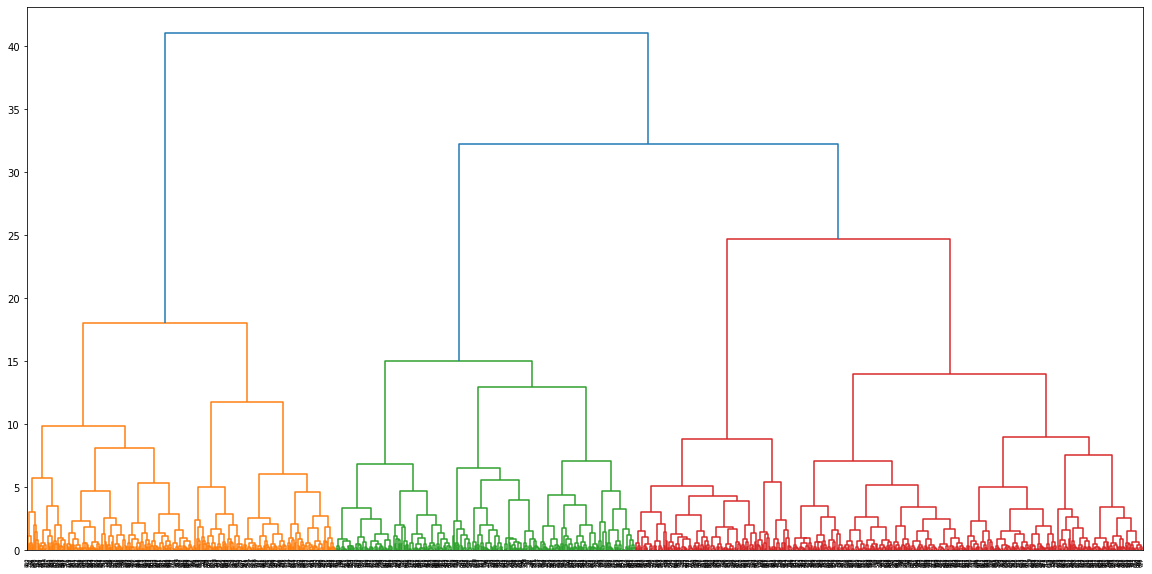

In [64]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


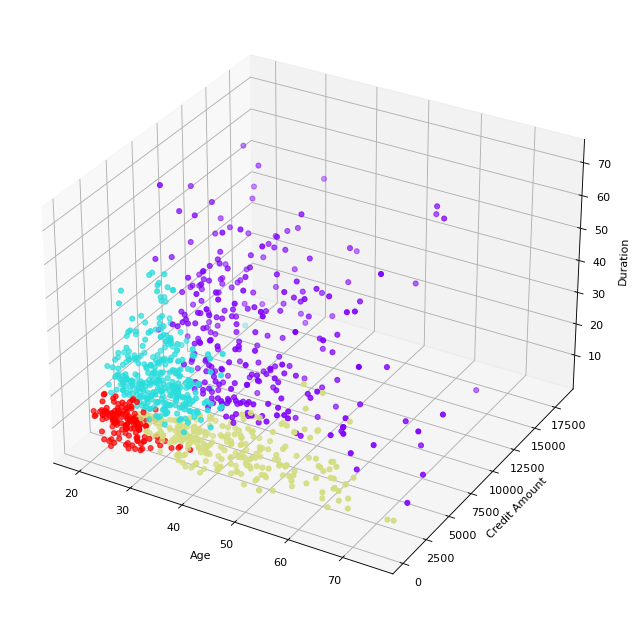

In [65]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

### The table above shows the centroid of each clusters that could determine the clusters rule. These are:

##### Cluster 0 : Higher credit amount, old, long duration customers
##### Cluster 1 : Lower credit amount, young, long duration customers
##### Cluster 2 : Lower credit amount, old, short duration customers
##### Cluster 3 : Lower credit amount, young, short duration customers

## Result Analysis

In [66]:
grouped_kmeans

,Credit amount,Age,Duration,Job
Cluster,,,,
0,1978.7,48.7,13.9,1.7
1,1733.6,27.8,14.2,1.8
2,5665.4,34.0,32.2,2.1


### The above table denotes 
#### Cluster 0 : Lower credit amount, old, short duration customers
##### Cluster  1 : Higher credit amount, old, long duration customers
#### Cluster 3 : Lower credit amount, young, short duration customers

Looking back from the centroid of the clusters, let's see the "returning power" of each of the centroid by dividing the Credit amount with the duration. The higher the "returning power".

In [67]:
df_clustered = df.assign(Cluster=kmeans_labels)

In [68]:
df_clustered.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,2
4,53,male,2,free,little,little,4870,24,car,2


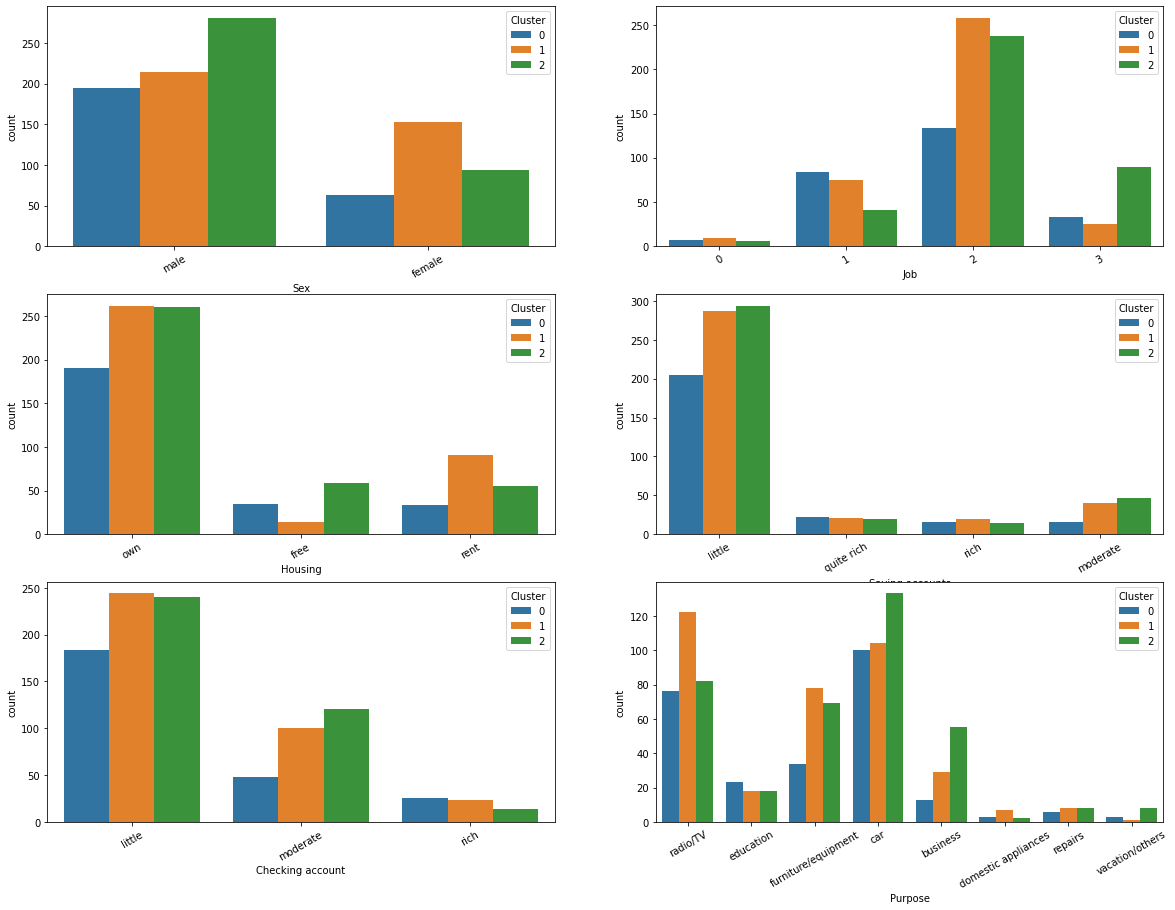

In [69]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df_clustered, hue=df_clustered['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()

Figures of the clusters distribution on each categorical feature.

## Summaries

1. After comparing three kind of clustering models, we decide to use k-means as the model
2. The data divided into three clusters
3. The three clusters can be used to determine the creditworthiness of the German Credit potential borrowers
4. Each of the cluster have their own characteristics


In [70]:
import  joblib

In [71]:
joblib.dump(km,'Customer Segmentation')  # successfully save the model

['Customer Segmentation']

In [72]:
# Load save data
model=joblib.load('Customer Segmentation')

In [73]:
df_clustered_kmeans['Cluster'].unique()

array([0, 2, 1])

In [74]:
#df_1=df

In [75]:
df_1=df_clustered_kmeans

In [76]:
df_1

,Credit amount,Age,Duration,Job,Cluster
0,1169,67,6,2,0
1,5951,22,48,2,2
2,2096,49,12,1,0
3,7882,45,42,2,2
4,4870,53,24,2,2
...,...,...,...,...,...
995,1736,31,12,1,1
996,3857,40,30,3,2
997,804,38,12,2,0
998,1845,23,45,2,2


In [77]:
df_1['Cluster'].unique()

array([0, 2, 1])

In [78]:
##### Cluster 0 : Higher credit amount, old, long duration customers
##### Cluster 1 : Lower credit amount, young, long duration customers
##### Cluster 2 : Lower credit amount, old, short duration customers
##### Cluster 3 : Lower credit amount, young, short duration customers

In [79]:
df_1.Cluster.replace(to_replace=[0,1,2],value=['Most Important','Important','Mediocre'],inplace=True)

In [80]:
df_1.to_excel('Customer_Segmentation.xlsx', index=False)